In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

## Carregando Bases de Dados

In [2]:
enem_total = pd.read_csv('../src/enem_total.csv')

enem = pd.read_csv('../src/enem_total_quant.csv')

enem_pad = pd.read_csv('../src/enem_total_quant_pad.csv')

enem_pad.set_index('NU_INSCRICAO', drop=True, inplace=True)

enem.head()

,NU_INSCRICAO,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA
0,190003903183,19.0,437.900000,423.700000,457.200000,461.900000,90.000000,113.860174,110.33980,90.000000,20.000000,340.000000,5.0,445.175000
1,190005124618,19.0,426.200000,548.700000,537.900000,427.700000,120.000000,120.000000,120.00000,120.000000,120.000000,600.000000,4.0,485.125000
2,190001447215,30.5,478.650951,508.523747,522.027327,524.382679,121.023304,124.093217,116.13592,122.950137,93.368051,577.570629,3.0,508.396176
3,190003825026,17.0,359.300000,520.100000,430.100000,493.300000,100.000000,120.000000,110.33980,100.000000,20.000000,440.000000,4.0,450.700000
4,190001995539,17.0,494.700000,503.700000,545.200000,585.600000,160.000000,130.233043,125.79612,170.000000,180.000000,820.000000,5.0,532.300000


In [3]:
enem_pad.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA
NU_INSCRICAO,,,,,,,,,,,,,
190003903183,-0.428397,-0.636175,-1.231092,-1.334171,-0.687464,-1.705344,-1.669531,-1.399352,-1.590848,-1.625610,-1.941498,0.833696,-1.095479
190005124618,-0.428397,-0.822042,0.573291,0.284978,-1.080209,-0.197405,-0.470414,0.357392,-0.217934,0.531056,0.134470,0.119915,-0.399954
190001447215,2.047514,0.011198,-0.006655,-0.033489,0.030073,-0.145969,0.328998,-0.345306,-0.082924,-0.043306,-0.044617,-0.593865,0.005194
190003825026,-0.858990,-1.884821,0.160449,-1.877900,-0.326874,-1.202697,-0.470414,-1.399352,-1.133210,-1.625610,-1.143049,0.119915,-0.999289
190001995539,-0.858990,0.266155,-0.076287,0.431443,0.733079,1.813181,1.528115,1.411439,2.070257,1.825056,1.891058,0.833696,0.421357


## Cluster KMEANS com método Silhouette e Elbow

In [4]:
inertias = []
valores_silhueta = []

for k in np.arange(2,10):
  kmeans = KMeans(n_clusters=k)
  labels = kmeans.fit_predict(enem_pad)
  inertias.append(kmeans.inertia_)
  media_silhueta = silhouette_score(enem_pad, labels)
  valores_silhueta.append(media_silhueta)

In [5]:
valores_silhueta

[0.3290351257394067,
 0.25738837590644337,
 0.19383784965371853,
 0.19656006419167676,
 0.18470345438067506,
 0.1824226249513278,
 0.17544625901886549,
 0.159126265708013]

Text(0, 0.5, 'Inertia')

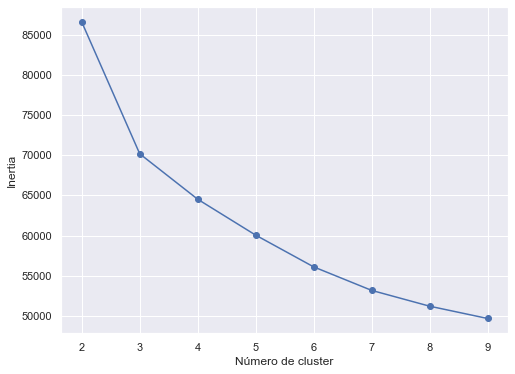

In [6]:
#Plotando o gráfico do Elbow Method
plt.figure(figsize=(8,6))
plt.plot(np.arange(2,10), inertias, '-o')
plt.xlabel('Número de cluster')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhueta')

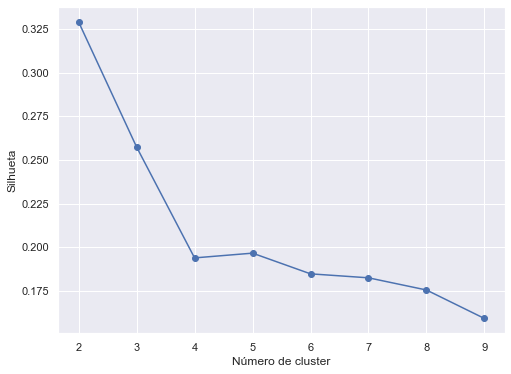

In [7]:
#Plotando o gráfico da Silhueta
plt.figure(figsize=(8,6))
plt.plot(np.arange(2,10), valores_silhueta, '-o')
plt.xlabel('Número de cluster')
plt.ylabel('Silhueta')

In [8]:
n_cluster = 5
kmeans = KMeans(n_clusters = n_cluster)
predict = kmeans.fit_predict(enem_pad)
enem['group'] = predict
enem_total['group'] = predict

In [9]:
centroids = kmeans.cluster_centers_

max = len(centroids[0])
for i in range(max):
    print(enem.columns.values[i],": {:.4f}".format(centroids[:, i].var()))

NU_INSCRICAO : 0.5810
NU_IDADE : 0.5877
NU_NOTA_CN : 0.6115
NU_NOTA_CH : 0.5801
NU_NOTA_LC : 0.5536
NU_NOTA_MT : 0.5771
NU_NOTA_COMP1 : 0.4529
NU_NOTA_COMP2 : 0.6732
NU_NOTA_COMP3 : 0.5991
NU_NOTA_COMP4 : 0.5877
NU_NOTA_COMP5 : 0.7828
NU_NOTA_REDACAO : 0.0739
Q005 : 0.7919


## Extraindo Informações dos Grupos

### Baseado nas Notas - var quant, consideradas no Cluster

In [10]:
description = enem.groupby("group")["NU_IDADE", "NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "NU_NOTA_REDACAO", "Q005"]
n_clients = description.size()
description = description.mean()
description['group'] = n_clients
print(description)

        NU_IDADE  NU_NOTA_CH  NU_NOTA_CN  NU_NOTA_LC  NU_NOTA_MT  \
group                                                              
0      28.167145  515.832364  480.042800  526.498105  516.218438   
1      19.159371  597.556790  560.090274  585.486897  635.396158   
2      18.957931  466.801997  432.999756  498.667420  464.343897   
3      19.033310  522.162338  487.334136  534.068496  533.693356   
4      20.710638  439.497920  424.897624  472.207210  453.528950   

       NU_NOTA_COMP1  NU_NOTA_COMP2  NU_NOTA_COMP3  NU_NOTA_COMP4  \
group                                                               
0         120.663293     122.809532     116.876110     120.575583   
1         151.279461     127.745414     124.881058     154.107744   
2         128.630409     123.353615     121.925378     133.842621   
3         120.547444     122.414886     117.117863     120.424958   
4         104.997636     116.925733     111.815093     103.229314   

       NU_NOTA_COMP5  NU_NOTA_REDACAO  

C:\Users\DESKTOP\AppData\Local\Temp/ipykernel_13092/194860749.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = enem.groupby("group")["NU_IDADE", "NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "NU_NOTA_REDACAO", "Q005"]


#### O que podemos tirar das médias dos grupos

 1. Quanto menor a idade maior a nota nas provas - Grupo 4
 2. Quanto maior a idade menor a nota nas provas - Grupo 3
 3. A segunda menor média de pessoas que residem na residência estão dentro desse grupo - Grupo 4
 4. A menor quantidade de pessoas está dentro desse grupo - Grupo 4
 5. O Grupo 0 está bem próximo para baixo do Grupo 4, tirando a quantidade de pessoas na residência que é maior e a quantidade total naquele grupo (o que talvez tenha ajudado a diminuir a média geral)

 Tem uma lógica sequencia de grupos, em ordem decrescente:
 
 - 19 anos * GRUPO 4: maiores médias de notas, menores médias de idades, menor média de quantidade de pessoas no grupo e de pessoas morando na residência
 - 23 anos * GRUPO 2: Destoa por ter a idade média acima do próximo grupo da lista, e notas médias um pouco menores que o grupo anterior
 - 20 anos * GRUPO 0: Maiores notas de comp e de redação que o anterior, menores notas de provas que o anterior.
 - 21 anos * GRUPO 1: Maior média de quantidade de pessoas no grupo e maior média de quantidade de pessias morando na residência.
 - 23 anos * GRUPO 0:



### Baseada na Raça

In [11]:
description = enem_total.groupby(["group", 'TP_COR_RACA'])['NU_NOTA_MEDIA'].mean()

enem_raca = pd.DataFrame(description)

enem_raca


NU_NOTA_MEDIA
group TP_COR_RACA               
0     0               506.862366
      1               512.379826
      2               506.266289
      3               509.096065
      4               511.593271
      5               521.051941
1     0               606.465064
      1               601.195074
      2               580.062500
      3               585.959775
      4               595.785904
      5               580.452083
2     0               458.188251
      1               469.984955
      2               463.933577
      3               464.070106
      4               462.987734
      5               464.737500
3     0               521.565134
      1               521.927877
      2               516.173639
      3               517.545906
      4               520.639510
      5               524.701636
4     0               449.272836
      1               453.935601
      2               446.928502
      3               444.712714
      4               447.959555
      5               436.770837

### Usando GROUP_BY por RAÇA

In [12]:
nota = enem_total.groupby('TP_COR_RACA')["NU_NOTA_MEDIA"].mean()

enem_group = pd.DataFrame(nota)

* Administração: 570 a 771
* Medicina: 769 a 901

In [13]:
enem_group = enem_group.sort_values(by='NU_NOTA_MEDIA', ascending=False)

In [14]:
enem_group.reset_index(level=0, inplace=True)

In [15]:
enem_group

,TP_COR_RACA,NU_NOTA_MEDIA
0,1,525.559595
1,0,513.275293
2,4,510.504370
3,3,497.912044
4,2,495.010635
5,5,487.360179


Legenda:
{ 0: Não declarado,
1: Branca,
2: Preta,
3: Parda,
4: Amarela,
5: Indígena } 

In [16]:
old = list(range(0,6))

new = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']

In [17]:
enem_group['TP_COR_RACA'] = enem_group['TP_COR_RACA'].replace(old, new)

In [18]:
enem_group

,TP_COR_RACA,NU_NOTA_MEDIA
0,Branca,525.559595
1,Não declarado,513.275293
2,Amarela,510.504370
3,Parda,497.912044
4,Preta,495.010635
5,Indígena,487.360179


Em média a os autodeclarados Pretos, Pardos e Indígenas estão com as menores médias de notas do ENEM.